## 前處理

In [1]:
import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time()

region = pd.read_csv('data/Region.csv')
confirmed = pd.read_csv('data/TimeProvince.csv')

/home/tingyu/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# import
pd.options.mode.chained_assignment = None      # 解決會噴 warning 的狀況

from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

### 資料前處理

In [3]:
# 將日期轉換成np.datetime64的型態
confirmed['date'] = confirmed['date'].astype(np.datetime64)

# 將韓國共16個行政區名稱存成list
province_list = []
for i in range(0,15):
    province_list.append(confirmed['province'][i])


# 新增尚未痊癒的欄位
confirmed['still'] = confirmed.apply(lambda x: x['confirmed'] - x['released'] - x['deceased'], axis=1)  

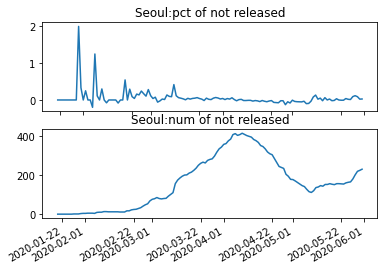

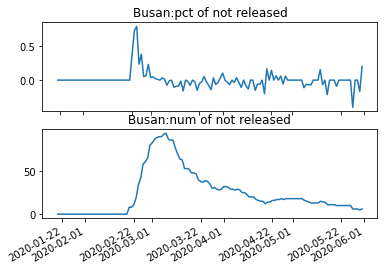

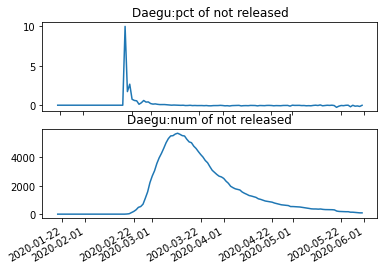

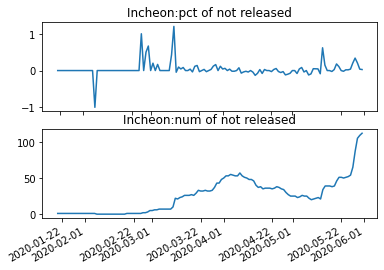

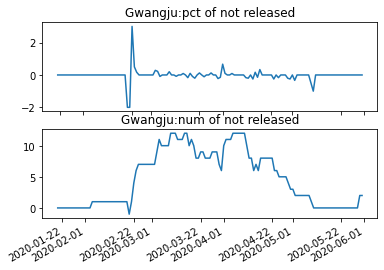

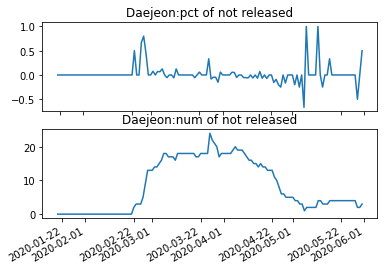

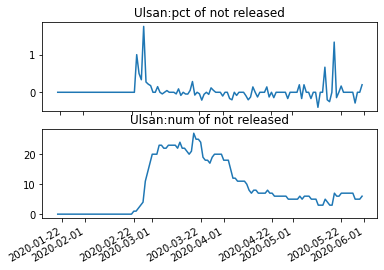

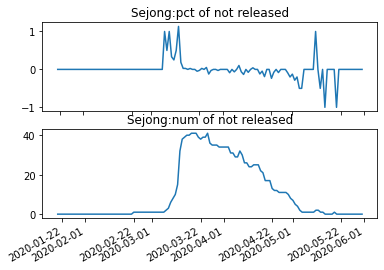

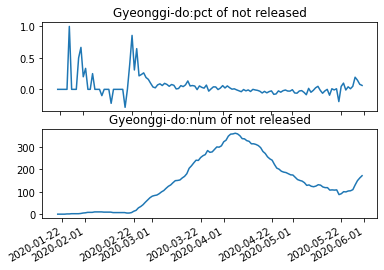

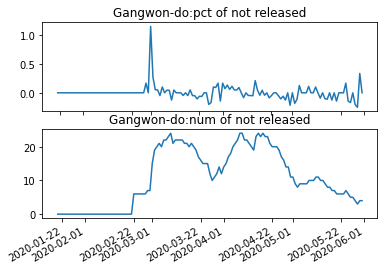

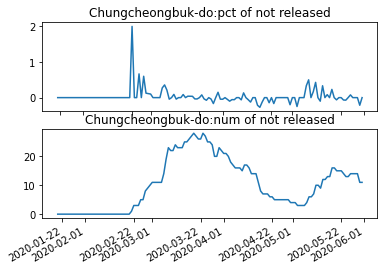

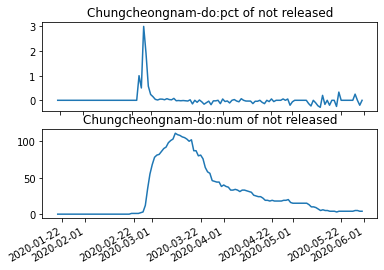

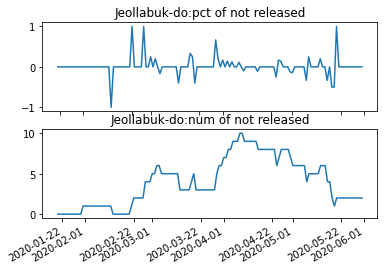

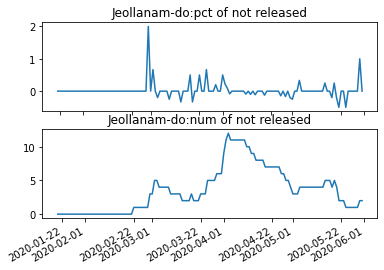

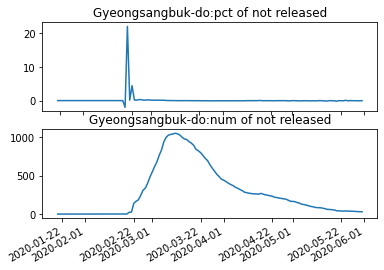

In [4]:
pct_change = {}

# 繪出不同行政區尚未痊癒的人數成長率
for province in province_list:
    p = confirmed[confirmed['province']==province]['still']
    p = p.reset_index(drop=True)
    
    y1 = p.pct_change()
    y1 = y1.replace([np.inf, -np.inf], np.nan)
    y1[y1.isna()]=0
    
    pct = preprocessing.normalize(y1.values.reshape(-1,1), axis=0)
    pct_change[province] = pct
    
    y2 = confirmed[confirmed['province']==province]['still']
    x = confirmed[confirmed['province']==province]['date']
    fig, ax = plt.subplots(2)
    ax[0].plot(x[1:],y1[1:])
    ax[0].set_title(province+":pct of not released")
    ax[1].plot(x,y2)
    ax[1].set_title(province+":num of not released")
    fig.autofmt_xdate()
    plt.show()


In [5]:
region['avg rate'] = 0.0
for province in province_list:
    region['avg rate'][region['city']==province] = pct_change[province].mean()

In [6]:
print(region.describe())
region[['elderly_alone_ratio','nursing_home_count' ,'academy_ratio' , 'avg rate']].corr()

               code    latitude   longitude  elementary_school_count  \
count    244.000000  244.000000  244.000000               244.000000   
mean   32912.090164   36.396996  127.661401                74.180328   
std    19373.349736    1.060304    0.904781               402.713482   
min    10000.000000   33.488936  126.263554                 4.000000   
25%    14027.500000   35.405263  126.927663                14.750000   
50%    30075.000000   36.386601  127.384250                22.000000   
75%    51062.500000   37.466119  128.473953                36.250000   
max    80000.000000   38.380571  130.905883              6087.000000   

       kindergarten_count  university_count  academy_ratio  \
count          244.000000        244.000000     244.000000   
mean           107.901639          4.151639       1.294754   
std            588.788320         22.513041       0.592898   
min              4.000000          0.000000       0.190000   
25%             16.000000          0.0000

,elderly_alone_ratio,nursing_home_count,academy_ratio,avg rate
elderly_alone_ratio,1.000000,-0.111793,-0.578918,-0.118682
nursing_home_count,-0.111793,1.000000,0.089914,0.260989
academy_ratio,-0.578918,0.089914,1.000000,0.073991
avg rate,-0.118682,0.260989,0.073991,1.000000
